In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt



In [9]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/joe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/joe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/joe/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:

# Load dataset
df = pd.read_csv('Youtube-Spam-Dataset.csv')
df


,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


In [11]:
headers= df.columns.tolist()
headers

['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'VIDEO_NAME', 'CLASS']

In [12]:
# Drop unnecessary columns
df = df.drop(columns=['COMMENT_ID'])
df


,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...
1951,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


In [13]:
# Check for missing values
df.isnull().sum()


AUTHOR          0
DATE          245
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64

In [14]:
print((df.isnull().sum()/len(df))*100)

AUTHOR         0.000000
DATE          12.525562
CONTENT        0.000000
VIDEO_NAME     0.000000
CLASS          0.000000
dtype: float64


In [15]:
# df.dropna(inplace=True)
# print((df.isnull().sum()/len(df))*100)

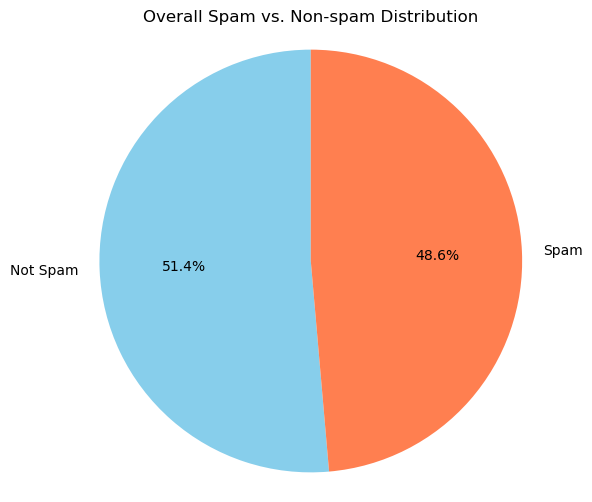

In [16]:
# @title Overall Spam vs. Non-spam Distribution

import matplotlib.pyplot as plt

# Calculate the counts of spam and non-spam comments
class_counts = df['CLASS'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Not Spam', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral'])
plt.title('Overall Spam vs. Non-spam Distribution')
_ = plt.axis('equal')

In [17]:
# # @title VIDEO_NAME

# from matplotlib import pyplot as plt
# import seaborn as sns
# df.groupby('VIDEO_NAME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Group data by video name and class, then count occurrences
# grouped_data = df.groupby(['VIDEO_NAME', 'CLASS'])['CLASS'].count().unstack()

# # Create the grouped bar chart
# grouped_data.plot(kind='barh', figsize=(10, 6), colormap='Dark2')

# # Customize the plot
# plt.title('Comment Distribution by Video Name and Class')
# plt.xlabel('Number of Comments')
# plt.ylabel('Video Name')
# plt.legend(title='Class', labels=['Not Spam', 'Spam'])  # Adjust labels as needed
# plt.gca().spines[['top', 'right']].set_visible(False)
# plt.tight_layout()
# plt.show()

In [19]:
# Function for text preprocessing
def preprocess_text(text, use_stemming=True):

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    if use_stemming:
        # Stemming
        stemmer = PorterStemmer()
        processed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    else:
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        processed_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(processed_tokens)


In [20]:
df[['CLASS']].value_counts(normalize = True)

CLASS
1        0.513804
0        0.486196
Name: proportion, dtype: float64

In [21]:
# Apply preprocessing to the dataset
df['PROCESSED_COMMENT'] = df['CONTENT'].apply(lambda x: preprocess_text(str(x)))
df


,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,PROCESSED_COMMENT
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,"huh , anyway check [ tube ] channel : kobyoshi02"
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,hey guy check new channel first vid us monkey ...
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,test say murdev.com
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1,shake sexi ass channel enjoy ^_^ ﻿
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1,watch ? v=vtarggvgtwq check .﻿
...,...,...,...,...,...,...
1951,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0,love song sing camp time ! !
1952,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0,love song two reason : 1.it africa 2.i born be...
1953,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0,wow
1954,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0,shakira u wiredo


In [22]:
# Split dataset into training and testing
X = df['PROCESSED_COMMENT']
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df[[X.name, y.name]]

,PROCESSED_COMMENT,CLASS
0,"huh , anyway check [ tube ] channel : kobyoshi02",1
1,hey guy check new channel first vid us monkey ...,1
2,test say murdev.com,1
3,shake sexi ass channel enjoy ^_^ ﻿,1
4,watch ? v=vtarggvgtwq check .﻿,1
...,...,...
1951,love song sing camp time ! !,0
1952,love song two reason : 1.it africa 2.i born be...,0
1953,wow,0
1954,shakira u wiredo,0


In [23]:
#Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [24]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)



LogisticRegression()

In [25]:
#model.predict(['Hello everyone'])

# Example inputf
new_comment = ["Click my link to win a prize"]

# Step 1: Transform the input using the trained TF-IDF vectorizer
new_comment_vectorized = vectorizer.transform(new_comment)  # Use the same TF-IDF vectorizer

# Step 2: Make predictions using the vectorized input
predicted_class = model.predict(new_comment_vectorized)

# Step 3: Display the result
print(f"The predicted class for the comment is: {predicted_class[0]}")

def predict_class():
  if predicted_class[0] == 0:
    return f"{new_comment} is NOT A SPAM MESSAGE"
  else:
    return f"{new_comment} IS A SPAM MESSAGE"
predict_class()

The predicted class for the comment is: 0


"['Click my link to win a prize'] is NOT A SPAM MESSAGE"

In [26]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9489795918367347
Confusion Matrix:
 [[168   8]
 [ 12 204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       176
           1       0.96      0.94      0.95       216

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392



In [28]:
import joblib

# Save the model and vectorizer
MODEL_PATH = "youtubespam_model.joblib"
VECTORIZER_PATH = "youtubespam_vectorizer.joblib"

joblib.dump(model, MODEL_PATH)
joblib.dump(vectorizer, VECTORIZER_PATH)

print(f"Model saved to {MODEL_PATH}")
print(f"Vectorizer saved to {VECTORIZER_PATH}")


Model saved to youtubespam_model.joblib
Vectorizer saved to youtubespam_vectorizer.joblib


In [29]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from scipy.sparse import hstack
# import matplotlib.pyplot as plt
# import nltk

# # Download NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Load dataset
# df = pd.read_csv('Youtube-Spam-Dataset.csv')
# df = df.drop(columns=['COMMENT_ID'])

# # Preprocess text
# def preprocess_text(text, use_stemming=True):
#     tokens = word_tokenize(text)
#     stop_words = set(stopwords.words('english'))
#     filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

#     if use_stemming:
#         stemmer = PorterStemmer()
#         processed_tokens = [stemmer.stem(word) for word in filtered_tokens]
#     else:
#         lemmatizer = WordNetLemmatizer()
#         processed_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

#     return ' '.join(processed_tokens)

# df['PROCESSED_COMMENT'] = df['CONTENT'].apply(lambda x: preprocess_text(str(x)))

# # Feature Engineering
# df['comment_length'] = df['CONTENT'].apply(len)
# df['num_exclamation'] = df['CONTENT'].apply(lambda x: x.count('!'))
# df['num_uppercase'] = df['CONTENT'].apply(lambda x: sum(1 for c in x if c.isupper()))

# # Train-Test Split
# X = df[['PROCESSED_COMMENT', 'comment_length', 'num_exclamation', 'num_uppercase']]
# y = df['CLASS']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # TF-IDF Vectorization
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train['PROCESSED_COMMENT'])
# X_test_tfidf = vectorizer.transform(X_test['PROCESSED_COMMENT'])

# # Combine TF-IDF with additional features
# X_train_combined = hstack([X_train_tfidf, X_train[['comment_length', 'num_exclamation', 'num_uppercase']].values])
# X_test_combined = hstack([X_test_tfidf, X_test[['comment_length', 'num_exclamation', 'num_uppercase']].values])

# # Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train_combined, y_train)
# y_pred_rf = rf_model.predict(X_test_combined)

# print("Random Forest:")
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
# print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# # Stacking Classifier
# estimators = [
#     ('rf', RandomForestClassifier(random_state=42)),
#     ('dt', DecisionTreeClassifier(random_state=42))
# ]
# stacking_model = StackingClassifier(
#     estimators=estimators,
#     final_estimator=LogisticRegression()
# )
# stacking_model.fit(X_train_combined, y_train)
# y_pred_stack = stacking_model.predict(X_test_combined)

# print("\nStacking Classifier:")
# print("Accuracy:", accuracy_score(y_test, y_pred_stack))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
# print("Classification Report:\n", classification_report(y_test, y_pred_stack))

# # Cross-validation for Stacking Classifier
# stack_cv_scores = cross_val_score(stacking_model, X_train_combined, y_train, cv=5, scoring='accuracy')
# print("\nStacking Classifier Cross-Validation Scores:", stack_cv_scores)
# print("Mean Cross-Validation Accuracy:", stack_cv_scores.mean())
